# Q.1.

## Importing Libraries

In [1]:
import sklearn
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

## Importing Data

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A239-1DCD

 Directory of C:\Users\HP\Documents\EXCELR ASSIGNMENTS\Simple Linear Regression Assignment

10-01-2023  16:24    <DIR>          .
10-01-2023  16:24    <DIR>          ..
10-01-2023  14:13    <DIR>          .ipynb_checkpoints
15-11-2022  12:30               218 delivery_time.csv
15-11-2022  12:30               318 Problem_statements.txt
15-11-2022  12:30               454 Salary_Data.csv
10-01-2023  16:23           109,996 SLR Assignment Q.1.Delivery time.ipynb
10-01-2023  16:24           125,160 SLR Assignment Q.2.Salary.ipynb
               5 File(s)        236,146 bytes
               3 Dir(s)  150,580,621,312 bytes free


In [3]:
Delivery_time= pd.read_csv("delivery_time.csv")
Delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA

In [4]:
Delivery_time.shape

(21, 2)

In [5]:
Delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
Delivery_time.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
Delivery_time.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [8]:
Delivery_time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
Delivery_time=Delivery_time.rename({'Delivery Time':'DT', 'Sorting Time':'ST'},axis=1)
Delivery_time

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Outlier Detection

<AxesSubplot:>

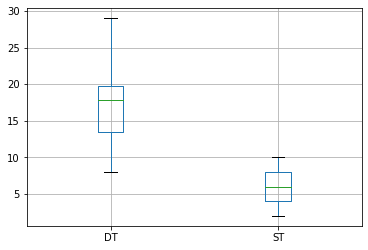

In [10]:
#Box Plot
Delivery_time.boxplot()

## Scatter Plot 

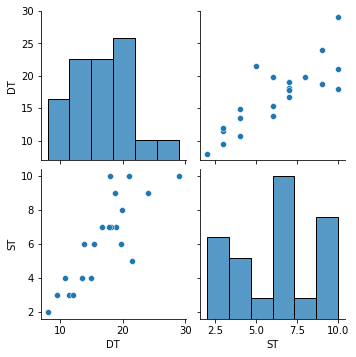

In [11]:
sns.pairplot(Delivery_time)

## Correlation Matrix

In [12]:
Delivery_time.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


<AxesSubplot:>

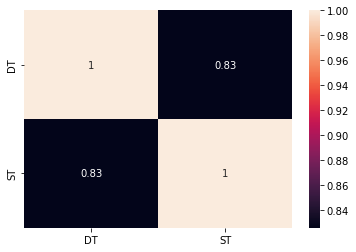

In [13]:
sns.heatmap(Delivery_time.corr(),annot=True)

### Checking Normality

<AxesSubplot:xlabel='DT', ylabel='Density'>

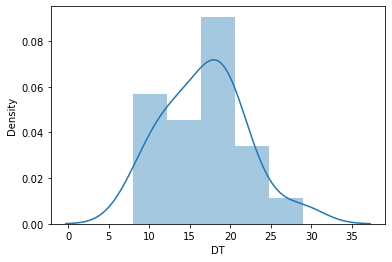

In [14]:
sns.distplot(Delivery_time['DT'])

<AxesSubplot:xlabel='ST', ylabel='Density'>

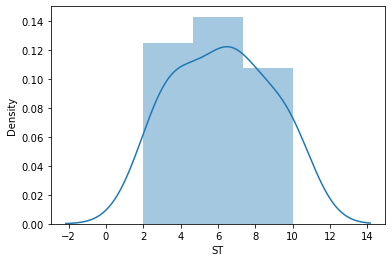

In [15]:
sns.distplot(Delivery_time['ST'])

## Building Model 

In [16]:
first_model = smf.ols("DT~ST",data=Delivery_time).fit()

In [17]:
first_model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [18]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        00:46:13   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
first_model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [20]:
first_model.predict()

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

## By using log transformation

In [21]:
second_model = smf.ols('DT~np.log(ST)',data=Delivery_time).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        00:46:16   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## By using exp transformation

In [22]:
third_model = smf.ols('DT~np.exp(ST)',data=Delivery_time).fit()
third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Wed, 11 Jan 2023   Prob (F-statistic):            0.00396
Time:                        00:46:17   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(ST)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## By using Sq transformation

In [23]:
Delivery_time["DT_Sq"] = Delivery_time.DT**2
fourth_model = smf.ols("np.log(ST)~DT+DT_Sq",data=Delivery_time).fit()
fourth_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(ST)   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     34.62
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           6.77e-07
Time:                        00:46:19   Log-Likelihood:                 3.2337
No. Observations:                  21   AIC:                           -0.4673
Df Residuals:                      18   BIC:                             2.666
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7780      0.450     -1.730      0.101      -1.723       0.167
DT             0.2272      0.052      4.346      0.000       0.117       0.337
DT_Sq         -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
fourth_model.predict()

array([2.11032295, 1.51115088, 2.04382428, 2.21547081, 2.21989697,
       1.70358413, 1.99751931, 0.99514913, 1.92091488, 1.98101669,
       2.04847991, 1.17107955, 1.82386636, 1.27023203, 1.33740268,
       1.65746554, 1.53886358, 1.93633752, 0.76641679, 1.9156903 ,
       2.13318573])

In [25]:
np.exp(fourth_model.predict())

array([8.2509055 , 4.53194353, 7.72007652, 9.16572344, 9.20638232,
       5.49360195, 7.37074885, 2.70512773, 6.82720166, 7.25011038,
       7.75610217, 3.22547281, 6.19576724, 3.5616789 , 3.8091371 ,
       5.24599819, 4.65929235, 6.93331128, 2.15204121, 6.79162541,
       8.44171704])

## By using log transformation in target

In [26]:
fifth_model = smf.ols('np.log(DT)~ST',data=Delivery_time).fit()
fifth_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.59e-06
Time:                        00:46:22   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Selection

#### After comparing the r-square values for the five models, we can say that the Fourth Model is good for our data because of high value of r-square.